In [4]:
import PyQt5
%matplotlib qt5
from IPython.display import Image
from matplotlib.lines import Line2D
import matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import mpl_finance as mpf
import matplotlib.dates as mdates
import talib

C:\Users\LUV\anaconda3\lib\site-packages\mpl_finance.py:16: DeprecationWarning: 



    Please use `mplfinance` instead (no hyphen, no underscore).

    To install: `pip install --upgrade mplfinance` 

   For more information, see: https://pypi.org/project/mplfinance/


  __warnings.warn('\n\n  ================================================================='+


In [5]:
def plot_support_resistance(dff, ticker):
#     tickerSymbol = ticker
#     tickerData = yf.Ticker(tickerSymbol)
#     df = tickerData.history(period="1d", start=start_date, end=end_date)
#     df.drop(['Stock Splits', 'Dividends'], axis=1, inplace=True)
    tickerSymbol = 'AAPL'

    tickerData = yf.Ticker(tickerSymbol)

    df = tickerData.history(period='1d', start='2022-3-8', end='2023-3-8')

    plt.rcParams['figure.figsize'] = [12, 12]
    plt.rc('font', size=14)
    def isResistance(df,i):
        return df['High'][i] > df['High'][i-1] and df['High'][i] > df['High'][i+1] and df['High'][i+1] > df['High'][i+2] and df['High'][i-1] > df['High'][i-2]

    def isSupport(df,i):
        return df['Low'][i] < df['Low'][i-1]  and df['Low'][i] < df['Low'][i+1] and df['Low'][i+1] < df['Low'][i+2] and df['Low'][i-1] < df['Low'][i-2]
   
    resistance_levels = []
    support_levels = []
    for i in range(2,df.shape[0]-2):
        if isSupport(df,i):
            support_levels.append((i,df['Low'][i]))
        elif isResistance(df,i):
            resistance_levels.append((i,df['High'][i]))
        
    avg_candlesize = np.mean(df['High'] - df['Low'])  

    def isFarFromLevel(l):
        # check if l is far from support levels
        far_from_support = np.sum([abs(l-x) < avg_candlesize for x in updated_support_levels]) == 0
        # check if l is far from resistance levels
        far_from_resistance = np.sum([abs(l-x) < avg_candlesize for x in updated_resistance_levels]) == 0
        return far_from_support or far_from_resistance

    updated_support_levels = []
    updated_resistance_levels = []

    df['Date']=mdates.date2num(df.index)
    for res in resistance_levels:
        if isFarFromLevel(res[1]):
            updated_resistance_levels.append(res)
        
    for sup in support_levels:
        if isFarFromLevel(sup[1]):
            updated_support_levels.append(sup) 
    
    def plot_all2():
        fig, ax = plt.subplots()
        mpf.candlestick_ohlc(ax,df[['Date','Open', 'High', 'Low', 'Close']].values,width=0.8,colorup='green', colordown='red', alpha=0.8)
        date_format = mdates.DateFormatter('%d %b %Y')
        ax.xaxis.set_major_formatter(date_format)
        fig.autofmt_xdate()
        ax.set_title('Support/Resistance Candlestick Chart-Less Noise',color='#800080',bbox=dict(facecolor='lightgrey', edgecolor='black'))
        ax.set_xlabel('Date',color='#800080')
        ax.set_ylabel('Price ($)',color='#800080')
        fig.tight_layout()

        support_label = 'Support'
        resistance_label = 'Resistance'

        support_lines = []
        for level in updated_support_levels:
            line = plt.hlines(level[1],xmin=df['Date'][level[0]],xmax=max(df['Date']),colors='blue',label=support_label)
            support_lines.append(line)

        resistance_lines = []
        for level in updated_resistance_levels:
            line = plt.hlines(level[1],xmin=df['Date'][level[0]],xmax=max(df['Date']),colors='#DEC20B',label=resistance_label)
            resistance_lines.append(line)

        legend_lines = [Line2D([0], [0], color='blue', lw=2, label=support_label), Line2D([0], [0], color='#DEC20B', lw=2, label=resistance_label)]
        ax.legend(handles=legend_lines,facecolor='lightgrey', framealpha=1.0)
        fig.savefig('sup_res.png')
        return fig
    figg=plot_all2()
    return figg  

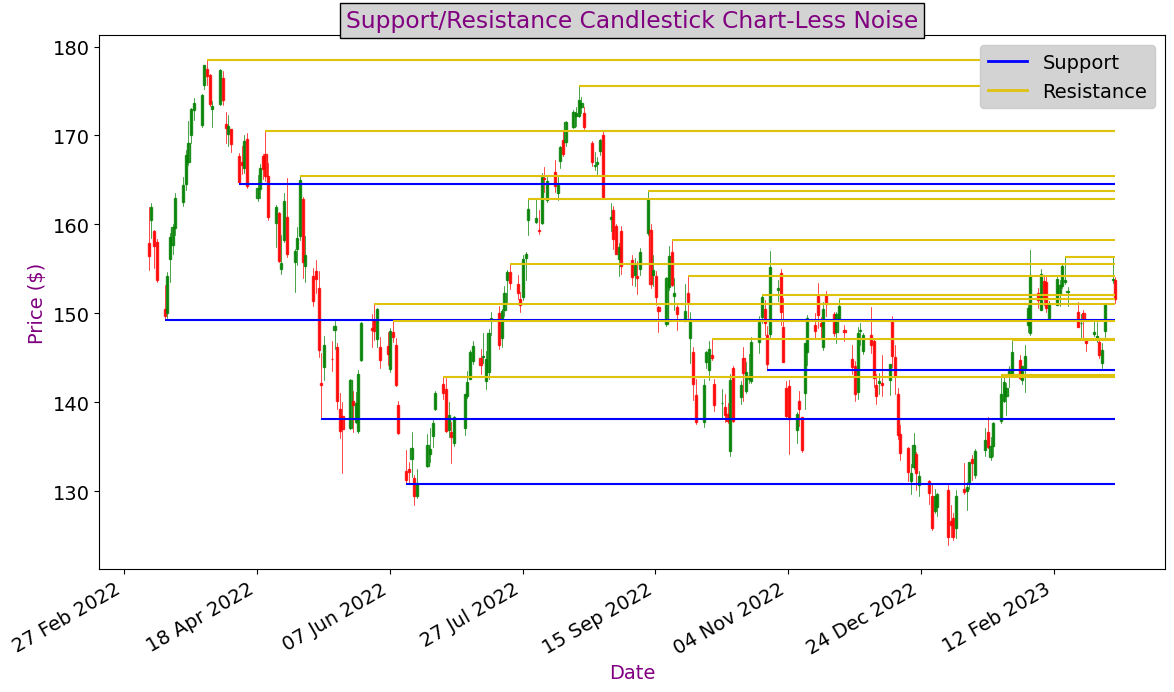

In [6]:
plot_support_resistance("df","AAPL")